# Squidpy visualisation of all cells in runs 1 and 3

Zhiyuan \
1 Jun 2024

In [2]:
#last modified:
import datetime
datetime.datetime.now().strftime("%B %d, %Y") + ", "+datetime.datetime.now().strftime("%I:%M %p")

'June 21, 2024, 09:32 PM'

In [3]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import anndata

import scanpy as sc
import squidpy as sq

sc.logging.print_header()

/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.5 anndata==0.10.1 umap==0.5.4 numpy==1.26.4 scipy==1.11.3 pandas==2.2.1 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.9.11 pynndescent==0.5.10


## view run1 cell type in the same coordinates

In [4]:
ad_run1 = sc.read_h5ad("merscope/analysis/clustering_mapping/results/run1/run1_tangram_out_ALLcells_vswanger_20240424.h5ad")
ad_all = sc.read_h5ad("merscope/merscope_run3/results/run1_3/tangram_out_ALLcells_vswanger_20240601.h5ad")

In [5]:
ad_all.obs_names

Index(['1705254700003100421_region_0', '1705254700003100442_region_0',
       '1705254700003100443_region_0', '1705254700003100450_region_0',
       '1705254700003100462_region_0', '1705254700003100470_region_0',
       '1705254700003100486_region_0', '1705254700003100490_region_0',
       '1705254700003100491_region_0', '1705254700003100492_region_0',
       ...
       '2437749000019200025_region_5', '2437749000019200026_region_5',
       '2437749000019200028_region_5', '2437749000019200030_region_5',
       '2437749000019200031_region_5', '2437749000019200032_region_5',
       '2437749000019200036_region_5', '2437749000019200038_region_5',
       '2437749000019200039_region_5', '2437749000019200040_region_5'],
      dtype='object', length=26063)

In [6]:
ad_all.obs["cell_type_run1"] = ad_run1.obs.loc[ad_run1.obs_names.isin(ad_all.obs_names), "cell_type"]

/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/huzhiy/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


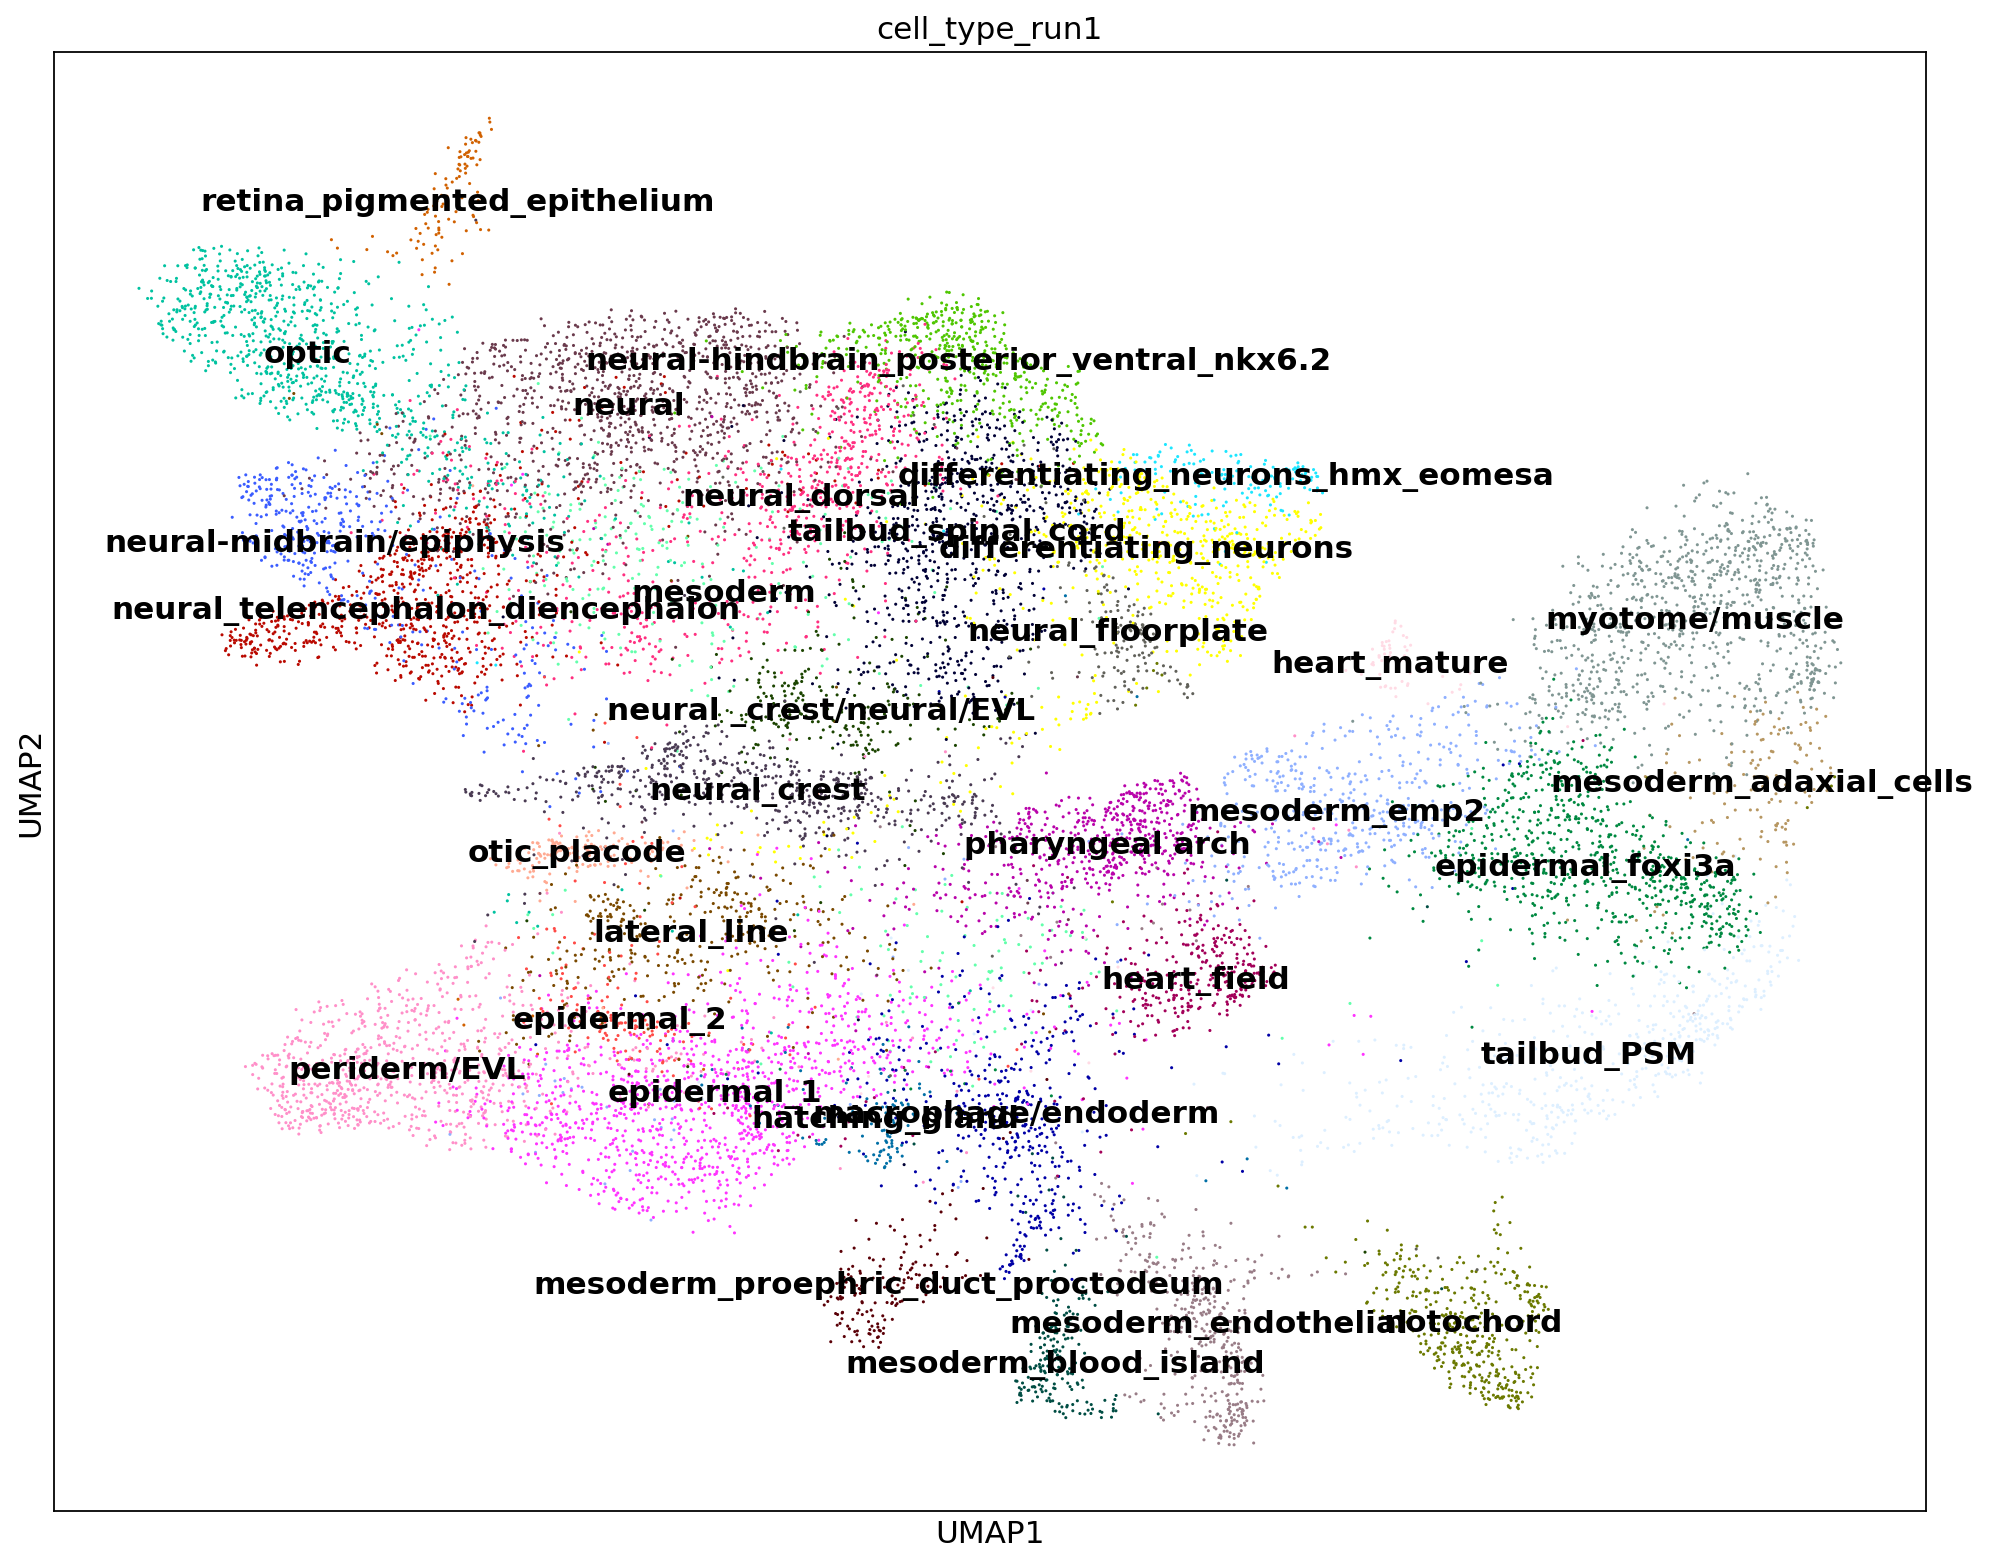

In [7]:
sc.set_figure_params(figsize=(15, 12))
sc.pl.umap(ad_all[ad_all.obs['sample'] == 'wt_late'].copy(), color=["cell_type_run1"], legend_loc="on data")

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a dataframe with the cell types
cell_types = ad_all.obs[["cell_type_run1", "cell_type"]]
# Drop rows with NaNs in 'cell_type' or 'cell_type_run1'
cell_types = cell_types.dropna(subset=["cell_type", "cell_type_run1"])
cell_types


,cell_type_run1,cell_type
1705254700003100421_region_0,epidermal_2,epidermal2
1705254700003100442_region_0,differentiating_neurons_hmx_eomesa,diff.neurons
1705254700003100443_region_0,differentiating_neurons_hmx_eomesa,diff.neurons
1705254700003100450_region_0,neural_telencephalon_diencephalon,neural-di/tel
1705254700003100462_region_0,neural_crest,neuralcrest
...,...,...
1705260600008200383_region_9,mesoderm,neural-hb/mb
1705260600008200396_region_9,periderm/EVL,periderm/EVL
1705260600008200398_region_9,tailbud_spinal_cord,neural-dorsalSC/hb
1705260600008200412_region_9,heart_mature,muscle


## plot the spatial (change the kernel to squidpy)

In [10]:
anno = pd.read_csv("merscope/merscope_run3/results/run1_3/run1_run3_anno_all20240601.csv", sep=',')
anno

,cluster,annotation,color
0,0,neural,#6A3A4C
1,1,lateral_line,#7A4900
2,2,neural-dorsal/hb/SC,#4FC601
3,3,myotome/muscle,#809693
4,4,periderm/EVL,#FF90C9
5,5,tailbud-PSM,#DDEFFF
6,6,epidermal-foxi3a,#008941
7,7,optic,#00C2A0
8,8,neural-dorsal/SC,#4FC601
9,9,differentiating_neurons,#FFFF00


In [11]:
# Convert 'leiden' to string if it's not already, to ensure matching types with AnnData
anno['leiden'] = anno['cluster'].astype(str)
# Create a dictionary mapping 'leiden' to 'cell_type'
leiden_to_celltype = dict(zip(anno['leiden'], anno['annotation']))
# Ensure the 'leiden' in AnnData is a string, if it's numeric or otherwise
ad_all.obs['leiden'] = ad_all.obs['leiden'].astype(str)

# Map cell_type using the dictionary
ad_all.obs['cell_type_run1_run3'] = ad_all.obs['leiden'].map(leiden_to_celltype)

In [12]:
col_dict = dict(zip(anno['annotation'].tolist(), anno['color'].tolist()))
my_palette =col_dict
my_palette

{'neural': '#6A3A4C',
 'lateral_line': '#7A4900',
 'neural-dorsal/hb/SC': '#4FC601',
 'myotome/muscle': '#809693',
 'periderm/EVL': '#FF90C9',
 'tailbud-PSM': '#DDEFFF',
 'epidermal-foxi3a': '#008941',
 'optic': '#00C2A0',
 'neural-dorsal/SC': '#4FC601',
 'differentiating_neurons': '#FFFF00',
 'neural-di/tel': '#BA0900',
 'heart field': '#FFE1E9',
 'epidermal1': '#FF34FF',
 'leukocyte/macrophage/endoderm': '#0000A6',
 'neura_crest': '#4B3D54',
 'pharyngeal arch': '#B903AA',
 'mesoderm/PA': '#63FFAC',
 'neural-mb/epi': '#3B5EFF',
 'neural-floorplate/notochord': '#61615A',
 'endothelial': '#997D87',
 'epidermal2': '#FF4A46',
 'hatching_gland': '#006FA6',
 'notochord': '#6B7900',
 'pronephric': '#5A0007',
 'otic_placode': '#FFAA92',
 'mesoderm_blood_island': '#004D43',
 'retina_pigmented_epithelium': '#D16100',
 'heart_mature': '#7A4900',
 'lens_placode': '#1BE6FF'}

In [13]:
ad_all.obs['cell_type_run1_run3']

1705254700003100421_region_0                 epidermal2
1705254700003100442_region_0    differentiating_neurons
1705254700003100443_region_0    differentiating_neurons
1705254700003100450_region_0              neural-di/tel
1705254700003100462_region_0                neura_crest
                                         ...           
2437749000019200032_region_5        neural-dorsal/hb/SC
2437749000019200036_region_5                 epidermal2
2437749000019200038_region_5                neura_crest
2437749000019200039_region_5                neura_crest
2437749000019200040_region_5                neura_crest
Name: cell_type_run1_run3, Length: 26063, dtype: object

In [14]:
from matplotlib.colors import ListedColormap

# Sort the categories in alphabetical order
sorted_categories = sorted(my_palette.keys())

# Create a ListedColormap from the sorted list of colors
sorted_palette = {key: my_palette[key] for key in sorted_categories}
custom_colormap = ListedColormap(list(sorted_palette.values()))


# Set the 'cell_type_run1_run3' column to a categorical type with sorted categories
ad_all.obs['cell_type_run1_run3'] = pd.Categorical(ad_all.obs['cell_type_run1_run3'],
                                                   categories=sorted_categories,
                                                   ordered=True)

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [16]:
import os
os.chdir("merscope/merscope_run3/figures/run1_run3/")

/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


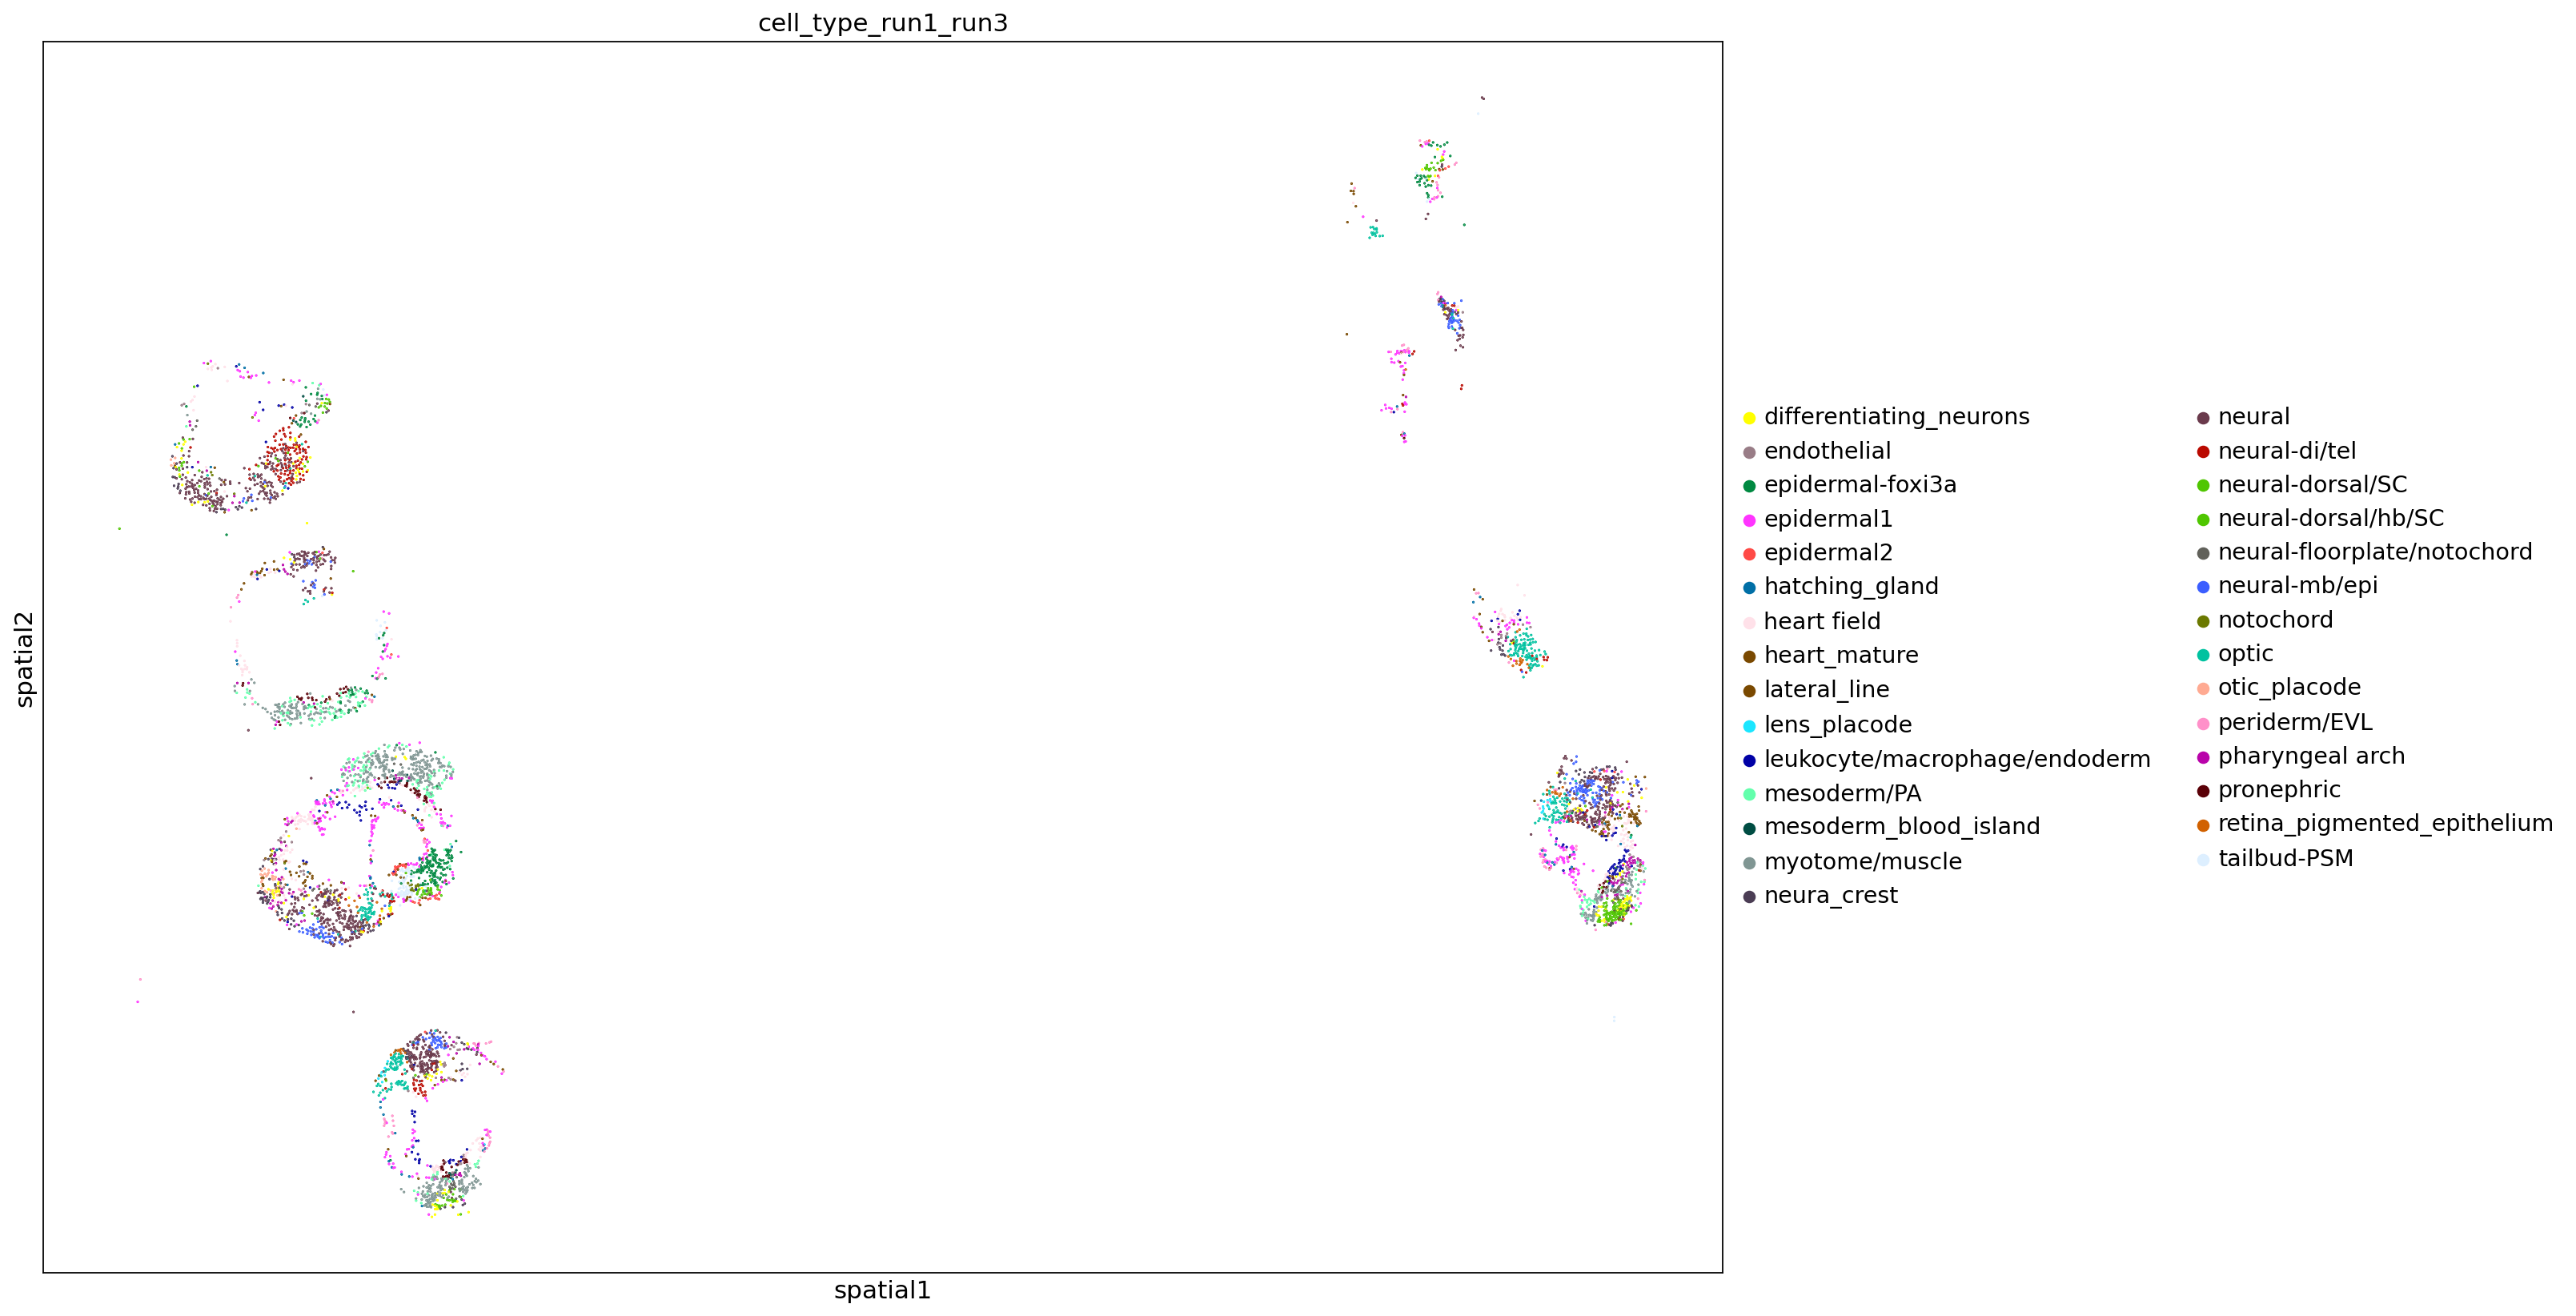

In [17]:
# Plot the spatial scatter plot
sq.pl.spatial_scatter(
    ad_all[ad_all.obs['sample'] == "mut_late"].copy(),
    color="cell_type_run1_run3",
    shape=None,
    figsize=(20,12),
    size=0.5,palette=custom_colormap, save="cell_type_global_mut_late.pdf"
)

## visualise NC

In [46]:
sp_nc = sc.read_h5ad("merscope/merscope_run3/results/run1_3/tangram_out_NCcells_vsmultiomeNC_20240601.h5ad")

In [48]:
anno = pd.read_csv("merscope/merscope_run3/results/run1_3/run1_run3_anno_NC20240601.csv", sep=',')
anno[0:3]

,cluster,annotation,color
0,0,Mutant_nohox_12_22ss/mNC_vagal/pigment,#DC9DA6
1,1,NC_trunk/NPB/Mutant-hox3,#A6CEE3
2,2,Pigment_gch2_high/Mutant_pigment,#9A77B8


In [69]:
ad_all.obs['NC_states'] = "Non_NC"
# Map cell_type to NC_states based on the index
ad_all.obs.loc[ad_all.obs.index, 'NC_states'] = sp_nc.obs['cell_type']
# Fill NaN values in NC_states with "Non_NC"
ad_all.obs['NC_states'] = ad_all.obs['NC_states'].fillna("Non_NC")
# Print a summary to verify the changes
print(ad_all.obs['NC_states'].head())

1705254700003100421_region_0                            Non_NC
1705254700003100442_region_0                            Non_NC
1705254700003100443_region_0                            Non_NC
1705254700003100450_region_0                            Non_NC
1705254700003100462_region_0    mNC/head_mes/Mut_nohox_cycling
Name: NC_states, dtype: object


In [70]:
col_dict = dict(zip(anno['annotation'].tolist(), anno['color'].tolist()))
my_palette =col_dict
my_palette['Non_NC'] = '#D3D3D3'

In [71]:
from matplotlib.colors import ListedColormap

# Sort the categories in alphabetical order
sorted_categories = sorted(my_palette.keys())

# Create a ListedColormap from the sorted list of colors
sorted_palette = {key: my_palette[key] for key in sorted_categories}
custom_colormap = ListedColormap(list(sorted_palette.values()))

# Set the 'cell_type_run1_run3' column to a categorical type with sorted categories
ad_all.obs['NC_states'] = pd.Categorical(ad_all.obs['NC_states'],
                                                   categories=sorted_categories,
                                                   ordered=True)

In [72]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [73]:
import os
os.chdir("merscope/merscope_run3/figures/run1_run3/")

/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/huzhiy/miniforge3/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


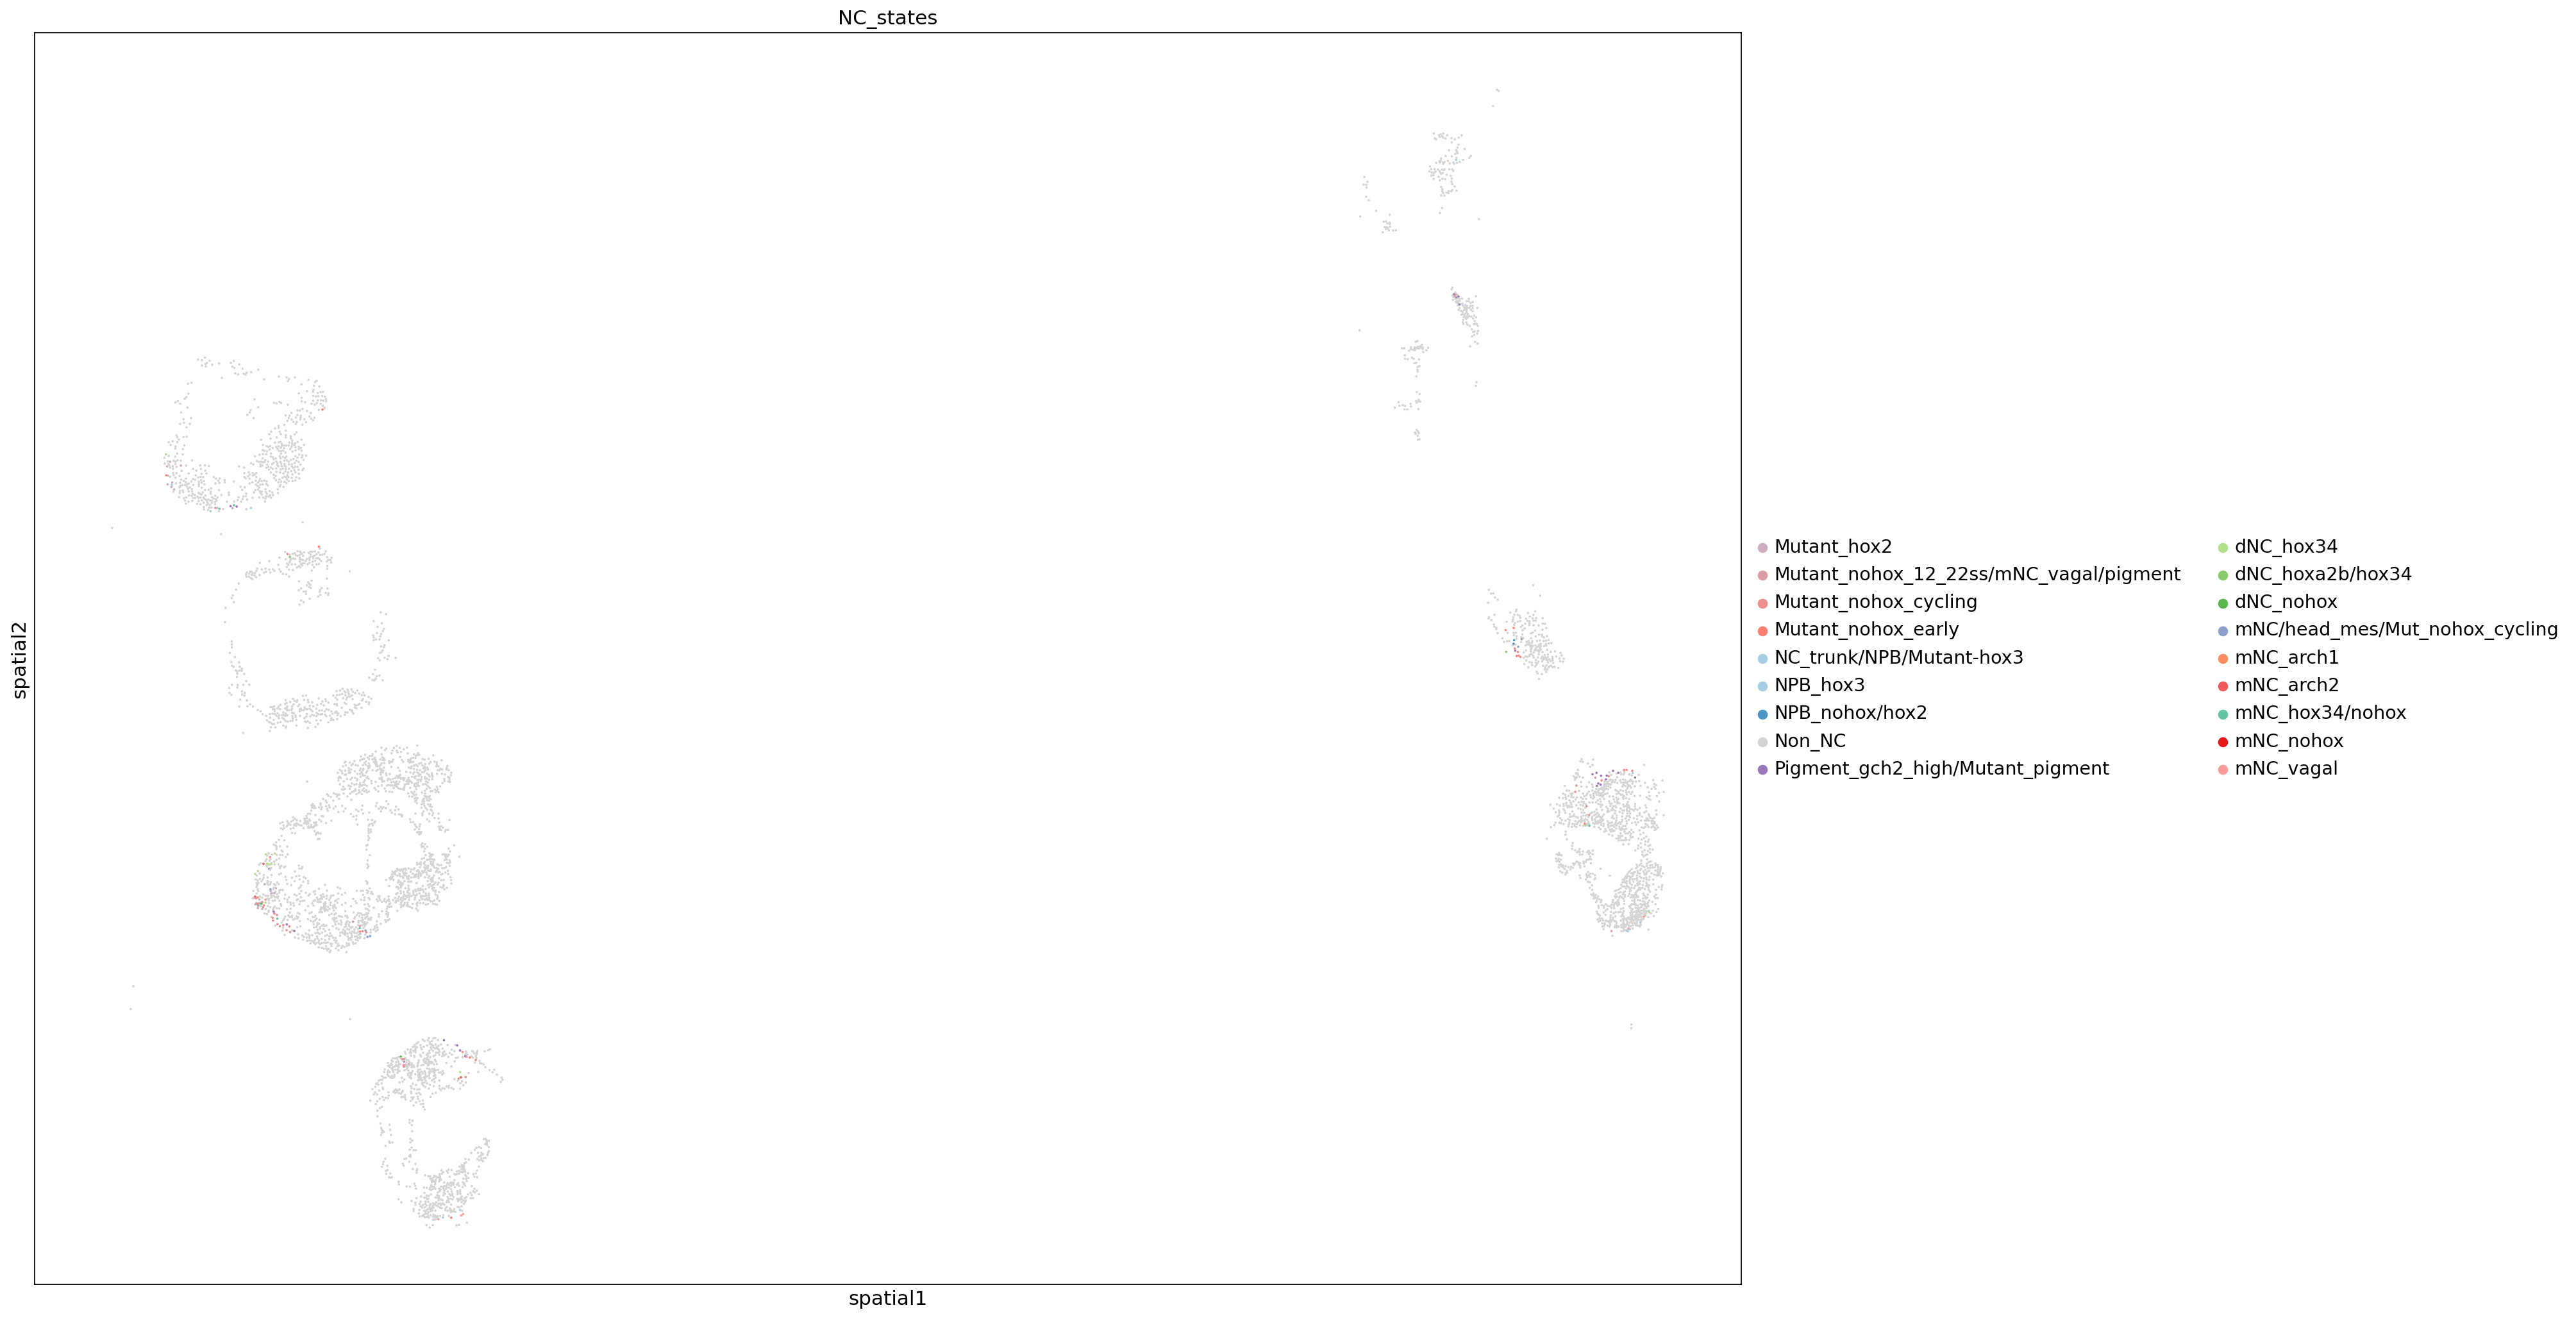

In [84]:
ad_filtered = ad_all[ad_all.obs['sample'] == "mut_late"].copy()
ad_filtered.obs['NC_states'] = pd.Categorical(ad_filtered.obs['NC_states'],
                                                   categories=sorted_categories,
                                                   ordered=True)
# Plot the spatial scatter plot
sq.pl.spatial_scatter(
    ad_filtered,
    color="NC_states",
    shape=None,
    figsize=(25,15),
    size=1,palette=custom_colormap, save="cell_type_NC_mut_late.svg"
)